In [21]:
!pip install shioaji
import numpy as np
import pandas as pd
import requests
import shioaji as sj
import datetime
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# 建立API物件，simulation=True是代表測試帳號
api = sj.Shioaji(simulation=True)

#登入你的key
# accounts = api.login("your api key","your secret key")



#要下單的話要匯入憑證
# api.activate_ca(
#     ca_path="/c/your/ca/path/Sinopac.pfx",
#     ca_passwd="YOUR_CA_PASSWORD",
#     person_id="Person of this Ca",
# )

Response Code: 0 | Event Code: 0 | Info: host '203.66.91.161:80', hostname '203.66.91.161:80' IP 203.66.91.161:80 (host 1 of 1) (host connection attempt 1 of 1) (total connection attempt 1 of 1) | Event: Session up


In [17]:
date_to_query = datetime.date(2024,3,22)
# 將日期轉換為字符串格式
date_str = date_to_query.strftime('%Y-%m-%d')

scanners = api.scanners(
    scanner_type=sj.constant.ScannerType.AmountRank,
    count=20,
    date=date_str
)
df = pd.DataFrame(s.__dict__ for s in scanners)
df.ts = pd.to_datetime(df.ts)
df

,date,code,name,ts,open,high,low,close,price_range,tick_type,...,volume_ratio,buy_price,buy_volume,sell_price,sell_volume,bid_orders,bid_volumes,ask_orders,ask_volumes,rank_value
0,2024-03-22,2317,鴻海,2024-03-22 14:30:00,144.0,148.5,142.0,145.5,6.5,2,...,1.28,145.5,31,146.0,2545,27561,1643374,12167,1409404,3.433777e+10
1,2024-03-22,2330,台積電,2024-03-22 14:30:00,788.0,789.0,775.0,785.0,14.0,1,...,0.67,784.0,67,785.0,702,3841,728258,4418,167218,2.398722e+10
2,2024-03-22,2308,台達電,2024-03-22 14:30:00,348.0,365.0,347.5,358.0,17.5,1,...,1.82,357.5,30,358.0,321,12937,266369,8342,97986,2.249017e+10
3,2024-03-22,2356,英業達,2024-03-22 14:30:00,57.5,61.8,57.3,61.1,4.5,1,...,6.58,61.0,100,61.1,75,28106,618796,21032,334823,1.942242e+10
4,2024-03-22,1503,士電,2024-03-22 14:30:00,275.5,280.0,268.5,274.0,11.5,2,...,1.20,274.0,71,274.5,119,9585,743559,8030,62871,1.486993e+10
5,2024-03-22,2376,技嘉,2024-03-22 14:30:00,292.0,305.0,287.0,303.0,18.0,2,...,1.85,303.0,223,303.5,156,8312,31506,7240,90368,1.192691e+10
6,2024-03-22,2382,廣達,2024-03-22 14:30:00,256.5,262.5,254.5,257.5,8.0,1,...,1.27,257.0,38,257.5,263,6588,173208,5196,30998,1.099701e+10
7,2024-03-22,3231,緯創,2024-03-22 14:30:00,121.0,124.5,120.5,123.0,4.0,2,...,2.01,123.0,463,123.5,2678,7186,173060,8160,176197,1.042782e+10
8,2024-03-22,2603,長榮,2024-03-22 14:30:00,176.5,177.0,168.0,170.0,9.0,2,...,1.04,170.0,775,170.5,131,4441,689178,7292,227378,9.188994e+09
9,2024-03-22,3661,世芯-KY,2024-03-22 14:30:00,3445.0,3545.0,3395.0,3450.0,150.0,1,...,0.79,3445.0,8,3450.0,14,956,11188,878,8781,9.106328e+09


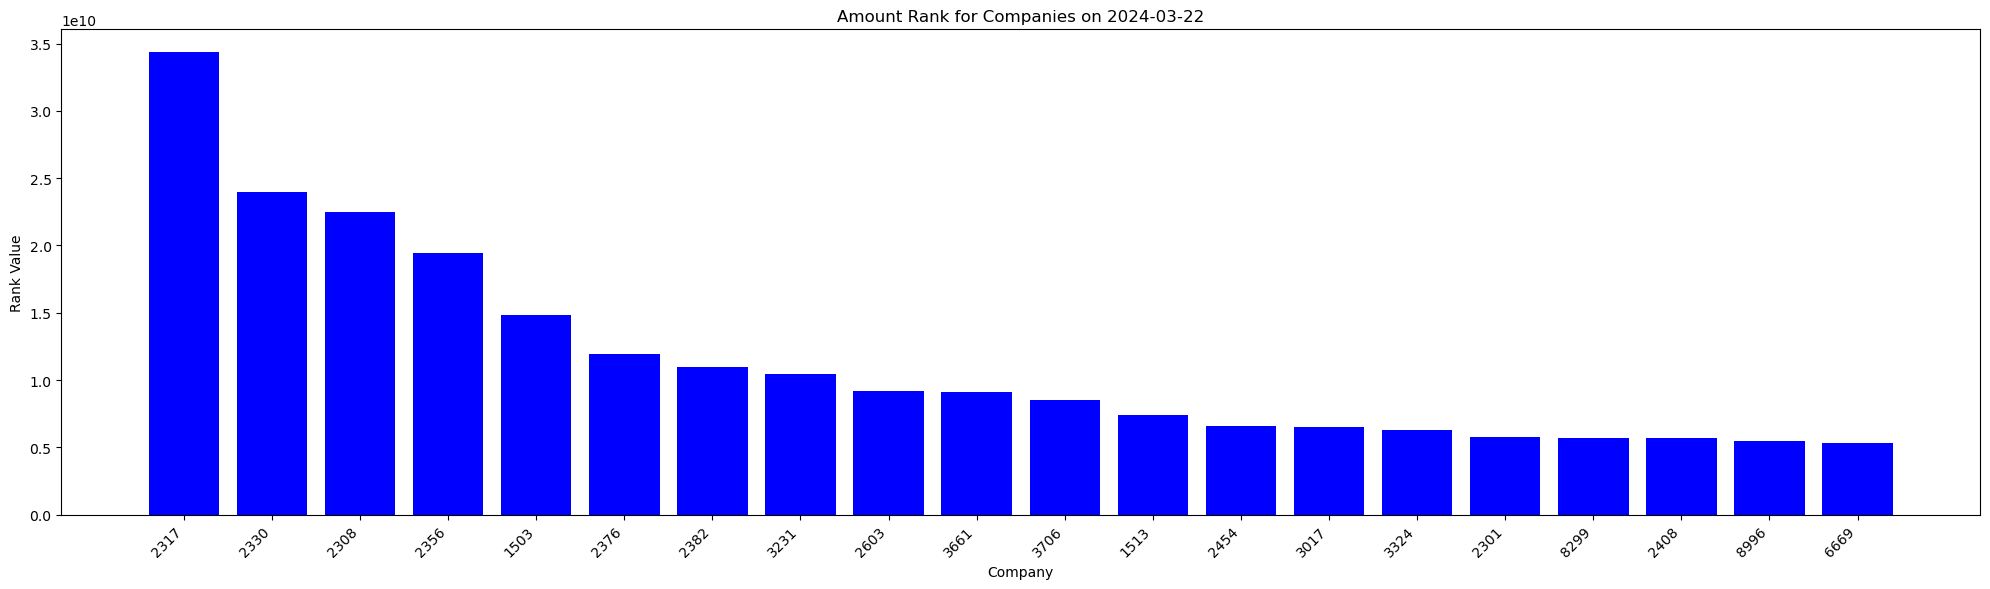

In [29]:
# 設置圖表大小
plt.figure(figsize=(20, 6))

# 提取 DataFrame 中的數據
names = df['code']
rank_values = df['rank_value']

# 繪製長條圖
plt.bar(names, rank_values, color='blue')

# 添加標籤和標題
plt.xlabel('Company')
plt.ylabel('Rank Value')
plt.title('Amount Rank for Companies on {}'.format(date_str))

# 自動調整 X 軸標籤
plt.xticks(rotation=45, ha='right')

# 顯示圖表
plt.tight_layout()
plt.show()


In [34]:
plt.close()
# 設置日期範圍
start_date = datetime.date(2024, 1, 1)
end_date = datetime.date(2024, 3, 22)
# 生成日期範圍
dates = [start_date + datetime.timedelta(days=x) for x in range((end_date - start_date).days + 1)]

# 創建動畫函數
def animate(date):
    date_str = date.strftime('%Y-%m-%d')
    scanners = api.scanners(
        scanner_type=sj.constant.ScannerType.AmountRank,
        count=20,
        date=date_str
    )
    df = pd.DataFrame(s.__dict__ for s in scanners)
    df.ts = pd.to_datetime(df.ts)
    
    plt.figure(figsize=(10, 6))
    plt.bar(df['code'], df['rank_value'], color='blue')
    plt.xlabel('company')
    plt.ylabel('amout value')
    plt.title('Amount Rank ({})'.format(date_str))
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    

# 關閉之前的圖表
plt.close()    
# 創建動畫
ani = animation.FuncAnimation(plt.figure(), animate, frames=dates, interval=100)

# 顯示動畫

plt.show()

<Figure size 640x480 with 0 Axes>